# Reducción de Dimensionalidad: Regularización

Hasta ahora hemos simplemente entrenado modelos sin revisar si habían mejores combinaciones de variables de manera ordenada. En la clase de hoy veremos un método para reducir la dimensionalidad del problema llamado regularización

Cuando regularizamos cambiamos el problema de optimización de manera que incluya un término que depende de los parámetros del modelo: 

$$ \min_\beta L(\beta,x, y) + \lambda R(\beta) $$

donde $R(\beta)$ es una función de los parámetros. 

Decimos que la regularización es L1 o Ridge si  $R(\beta) = \sum_{i=0}^n ||\beta_i||$

Por otro lado, si  $R(\beta) = 1/2\sum_i ||\beta_{i=0}^n||^2$ , decimos que la regresión es L2 o Lasso. 

Si el parámetro $\lambda$ es más grande los valores de los coeficientes del modelo serán más pequeños. Veremos un ejemplo de esto a continuación
    

## Ejemplo: Learning to remove Internet advertisements

El obejtivo de este dataset es identificar ads en sitios web. 

Fuente: http://www.sc.ehu.es/ccwbayes/docencia/mmcc/docs/lecturas-clasificacion/abstracts-resumir/kushmerick99learning.pdf

In [202]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [203]:
%matplotlib inline

In [128]:
docs = pd.read_csv('C://Users//HP PC//Documents//20190722-ESEN//ad.DOCUMENTATION', sep = ':',  encoding='latin-1')

In [142]:
for i in docs[docs.columns[0]]:
    if not ('|' in i):
        print(i)

2. Sources
   (a) Creator & donor
   (c) Generated
3. Past Usage
   N. Kushmerick (1999). "Learning to remove Internet advertisements",
   3rd Int Conf Autonomous Agents.  Available at
   www.cs.ucd.ie/staff/nick/research/download/kushmerick-aa99.ps.gz.
   Accuracy >97% using C4.5rules in predicting whether an image is an
   advertisement.
4. This dataset represents a set of possible advertisements on
   Internet pages.  The features encode the geometry of the image (if
   available) as well as phrases occuring in the URL, the image's URL and
   alt text, the anchor text, and words occuring near the anchor text.
   The task is to predict whether an image is an advertisement ("ad") or
   not ("nonad").
5. Number of Instances
6. Number of Attributes
   "STANDARD encoding" mentioned in the [Kushmerick, 99].)
   One or more of the three continous features are missing in 28%
   of the instances; missing values should be interpreted as "unknown".
7. See [Kushmerick, 99] for details of the at

In [141]:
docs[docs.columns[0]]

0                                            2. Sources
1                                   (a) Creator & donor
2                                         (c) Generated
3                                         3. Past Usage
4        N. Kushmerick (1999). "Learning to remove I...
5         3rd Int Conf Autonomous Agents.  Available at
6        www.cs.ucd.ie/staff/nick/research/download/...
7        Accuracy >97% using C4.5rules in predicting...
8                                        advertisement.
9     4. This dataset represents a set of possible a...
10       Internet pages.  The features encode the ge...
11       available) as well as phrases occuring in t...
12       alt text, the anchor text, and words occuri...
13       The task is to predict whether an image is ...
14                                       not ("nonad").
15                               5. Number of Instances
16                              6. Number of Attributes
17       "STANDARD encoding" mentioned in the [K

In [36]:
names = pd.read_csv('C://Users//HP PC//Documents//20190722-ESEN//ad.names', sep = ':',  encoding='latin-1')
names

,"| ""w","\c4.5\alladA"" names file -- automatically generated!"
0,"ad, nonad | classes.",NaN
1,height,continuous.
2,width,continuous.
3,aratio,continuous.
4,local,"0,1."
5,| 457 features from url terms,NaN
6,url*images+buttons,"0,1."
7,url*likesbooks.com,"0,1."
8,url*www.slake.com,"0,1."
9,url*hydrogeologist,"0,1."


In [37]:
column_names = []
for i in names[names.columns[0]]:
    if '|' in i:
        print(i)

ad, nonad | classes.
| 457 features from url terms
| 495 features from origurl terms
| 472 features from ancurl terms
| 111 features from alt terms
| 19 features from caption terms


In [43]:
column_names = []
for i in names[names.columns[0]]:
    if not ('|' in i):
        print(i)
        column_names.append(i)

len(column_names)

height
width
aratio
local
url*images+buttons
url*likesbooks.com
url*www.slake.com
url*hydrogeologist
url*oso
url*media
url*peace+images
url*blipverts
url*tkaine+kats
url*labyrinth
url*advertising+blipverts
url*images+oso
url*area51+corridor
url*ran+gifs
url*express-scripts.com
url*off
url*cnet
url*time+1998
url*josefina3
url*truluck.com
url*clawnext+gif
url*autopen.com
url*tvgen.com
url*pixs
url*heartland+5309
url*meadows+9196
url*blue
url*ad+gif
url*area51
url*www.internauts.ca
url*afn.org
url*ran.org
url*shareware.com
url*baons+images
url*area51+labyrinth
url*pics
url*image+navigate
url*pool+images
url*carousel.org
url*members.accessus.net
url*cmp+flowsoft010
url*smallb+gif
url*www.FlowSoft.com
url*kandinsky
url*csuhayward.edu
url*www.yahoo.co.uk
url*ibitexas.com
url*www.haestad.com
url*antiwar.com
url*www.monmouth.com
url*infoserver.etl.vt.edu
url*geoguideii+tour
url*heartland+pointe
url*romancebooks+pix
url*468x60
url*ads.switchboard.com
url*keith+dumble
url*cqi.com
url*images+ixfo

1558

In [48]:
data = pd.read_csv('C://Users//HP PC//Documents//20190722-ESEN//ad.data', names = column_names+['target']) 


C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
data.describe()

,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,url*peace+images,url*blipverts,url*tkaine+kats,url*labyrinth,...,caption*of,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you
count,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,...,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000,3279.000000
mean,0.004270,0.011589,0.004575,0.003355,0.003965,0.011589,0.003355,0.004880,0.009149,0.004575,...,0.006099,0.004575,0.003660,0.002440,0.003050,0.006404,0.012809,0.013419,0.009759,0.001525
std,0.065212,0.107042,0.067491,0.057831,0.062850,0.107042,0.057831,0.069694,0.095227,0.067491,...,0.077872,0.067491,0.060393,0.049341,0.055148,0.079783,0.112466,0.115077,0.098320,0.039026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
data.head(11)

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [72]:
data.isna().sum().sort_values(ascending=False)

target                      0
origurl*chapel+safehaven    0
origurl*lolnad+private      0
origurl*ibitexas.com        0
origurl*wco.com             0
                           ..
ancurl*any+time             0
ancurl*1+cid                0
ancurl*ring                 0
ancurl*FlowSoft.com         0
height                      0
Length: 1559, dtype: int64

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to target
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


In [109]:
data[data.columns[data.dtypes=='object']]

,height,width,aratio,local,target
0,125,125,1.0,1,ad.
1,57,468,8.2105,1,ad.
2,33,230,6.9696,1,ad.
3,60,468,7.8,1,ad.
4,60,468,7.8,1,ad.
5,60,468,7.8,1,ad.
6,59,460,7.7966,1,ad.
7,60,234,3.9,1,ad.
8,60,468,7.8,1,ad.
9,60,468,7.8,1,ad.


In [108]:
data['height'] = data.height.str.replace('?', '0')
data['width'] = data.width.str.replace('?', '0')
data['aratio'] = data.aratio.str.replace('?', '0')
data['local'] = data.local.str.replace('?', '0')


In [114]:
data.isna().sum().sort_values()

height                       0
ancurl*FlowSoft.com          0
ancurl*ring                  0
ancurl*1+cid                 0
ancurl*any+time              0
                          ... 
origurl*ibitexas.com         0
origurl*lolnad+private       0
origurl*pharmacy             0
target                       0
local                     1231
Length: 1559, dtype: int64

In [126]:
data['height'] = pd.to_numeric(data.height)
data['width'] = pd.to_numeric(data.width)
data['aratio'] = pd.to_numeric(data.aratio)

In [127]:
data[data.columns[data.dtypes=='object']]

,local,target
0,1,ad.
1,1,ad.
2,1,ad.
3,1,ad.
4,1,ad.
5,1,ad.
6,1,ad.
7,1,ad.
8,1,ad.
9,1,ad.


In [ ]:
data[data.columns[data.dtypes=='object']]

In [115]:
X = np.array(data.drop(['local','target'], axis=1))
y = np.array(pd.get_dummies(data['target'])['ad.'])

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [117]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [146]:

model = LogisticRegression()
fittedmodel = model.fit(x_train, y_train)

fittedmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
model.score(x_test, y_test)

0.9857723577235772

In [123]:
model.score(x_train, y_train)

0.9803921568627451

In [151]:
print(len(fittedmodel.coef_.reshape(-1,1)))

#1557 coeficientes!! Eso es mucho!

1557


## Cambiando C = 1/$\lambda$, penalty

In [176]:
 model = LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2')
Lasso = model.fit(x_train, y_train)

Lasso

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [188]:
Lasso.score(x_test, y_test)

0.983739837398374

In [177]:
pd.DataFrame(Lasso.coef_).describe()

,0,1,2,3,4,5,6,7,8,9,...,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556
count,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,-0.01628,0.01315,-0.181154,-0.121073,-0.195495,-0.244951,-0.110659,-0.156201,0.802552,-0.119853,...,-0.359513,-0.326543,-0.160582,-0.109694,0.759108,-0.104259,0.765499,0.872286,0.803589,-0.202739
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-0.01628,0.01315,-0.181154,-0.121073,-0.195495,-0.244951,-0.110659,-0.156201,0.802552,-0.119853,...,-0.359513,-0.326543,-0.160582,-0.109694,0.759108,-0.104259,0.765499,0.872286,0.803589,-0.202739
25%,-0.01628,0.01315,-0.181154,-0.121073,-0.195495,-0.244951,-0.110659,-0.156201,0.802552,-0.119853,...,-0.359513,-0.326543,-0.160582,-0.109694,0.759108,-0.104259,0.765499,0.872286,0.803589,-0.202739
50%,-0.01628,0.01315,-0.181154,-0.121073,-0.195495,-0.244951,-0.110659,-0.156201,0.802552,-0.119853,...,-0.359513,-0.326543,-0.160582,-0.109694,0.759108,-0.104259,0.765499,0.872286,0.803589,-0.202739
75%,-0.01628,0.01315,-0.181154,-0.121073,-0.195495,-0.244951,-0.110659,-0.156201,0.802552,-0.119853,...,-0.359513,-0.326543,-0.160582,-0.109694,0.759108,-0.104259,0.765499,0.872286,0.803589,-0.202739
max,-0.01628,0.01315,-0.181154,-0.121073,-0.195495,-0.244951,-0.110659,-0.156201,0.802552,-0.119853,...,-0.359513,-0.326543,-0.160582,-0.109694,0.759108,-0.104259,0.765499,0.872286,0.803589,-0.202739


In [255]:
scores = []
coefs_length = []

for i in range(1,300):
    model = LogisticRegression(C=i/100, penalty='l2')
    Lasso = model.fit(x_train, y_train)

    scores.append(Lasso.score(x_test, y_test))
    
    coefs_length.append(len(Ridge.coef_[Lasso.coef_!=0]))

Text(0,0.5,'Cantidad de Coeficientes Dist de 0')

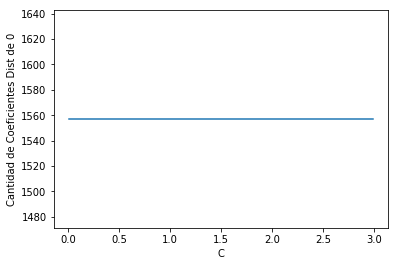

In [256]:
fig  = plt.figure()
plt.plot(np.arange(1,300)/100, coefs_length )
plt.xlabel('C')
plt.ylabel('Cantidad de Coeficientes Dist de 0')

Text(0,0.5,'Cantidad de Coeficientes Dist de 0')

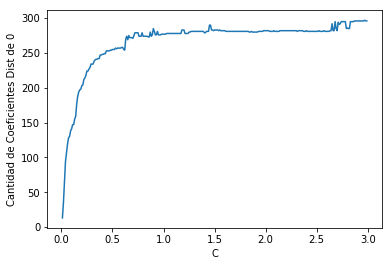

In [258]:
scores = []
coefs_length = []

for i in range(1,300):
    model = LogisticRegression(C=i/100, penalty='l2')
    Lasso = model.fit(x_train, y_train)

    scores.append(Lasso.score(x_test, y_test))
    
    coefs_length.append(len(Ridge.coef_[Lasso.coef_>0.1]))

fig  = plt.figure()
plt.plot(np.arange(1,300)/100, coefs_length )
plt.xlabel('C')
plt.ylabel('Cantidad de Coeficientes Dist de 0')

Text(0,0.5,'Score en el set de Prueba')

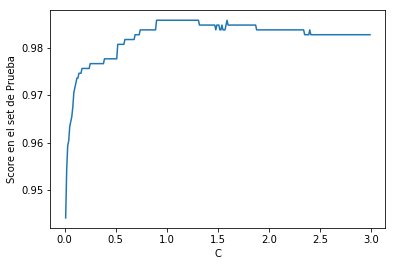

In [266]:
fig  = plt.figure()
plt.plot(np.arange(1,300)/100, scores )
plt.xlabel('C')
plt.ylabel('Score en el set de Prueba')
#plt.xlim((0.05,3.0))
#plt.ylim((0.96,1.0))

In [267]:
#scores

### Ridge

In [194]:
model = LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1')
Ridge = model.fit(x_train, y_train)

Ridge

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [195]:
pd.DataFrame(Ridge.coef_).describe()

,0,1,2,3,4,5,6,7,8,9,...,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556
count,1.00000,1.000000,1.0000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.00000,1.000000,1.0
mean,-0.02206,0.018139,-0.2701,0.0,0.0,-0.045878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.208256,3.21108,1.809471,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-0.02206,0.018139,-0.2701,0.0,0.0,-0.045878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.208256,3.21108,1.809471,0.0
25%,-0.02206,0.018139,-0.2701,0.0,0.0,-0.045878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.208256,3.21108,1.809471,0.0
50%,-0.02206,0.018139,-0.2701,0.0,0.0,-0.045878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.208256,3.21108,1.809471,0.0
75%,-0.02206,0.018139,-0.2701,0.0,0.0,-0.045878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.208256,3.21108,1.809471,0.0
max,-0.02206,0.018139,-0.2701,0.0,0.0,-0.045878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.208256,3.21108,1.809471,0.0


In [196]:
Ridge.score(x_test, y_test)

0.9796747967479674

In [197]:
len(Ridge.coef_[Ridge.coef_!=0])

291

In [200]:
scores = []
coefs_length = []

for i in range(1,300):
    model = LogisticRegression(C=i/100, penalty='l1')
    Ridge = model.fit(x_train, y_train)

    scores.append(Ridge.score(x_test, y_test))
    
    coefs_length.append(len(Ridge.coef_[Ridge.coef_!=0]))

Text(0,0.5,'Cantidad de Coeficientes Dist de 0')

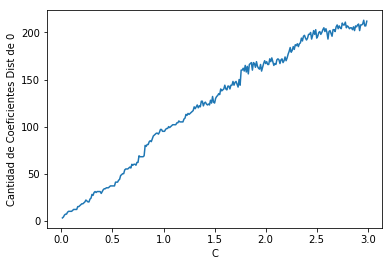

In [214]:
fig  = plt.figure()
plt.plot(np.arange(1,300)/100, coefs_length )
plt.xlabel('C')
plt.ylabel('Cantidad de Coeficientes Dist de 0')

Text(0,0.5,'Score en el set de Prueba')

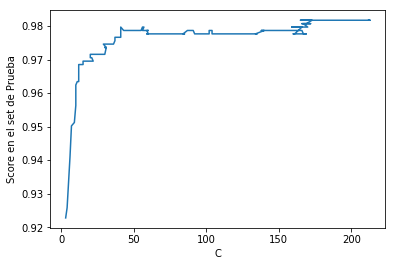

In [215]:
fig  = plt.figure()
plt.plot( coefs_length, scores)
plt.xlabel('C')
plt.ylabel('Score en el set de Prueba')

Text(0,0.5,'Score en el set de Prueba')

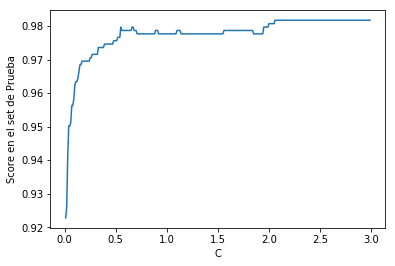

In [211]:
fig  = plt.figure()
plt.plot(np.arange(1,300)/100, scores )
plt.xlabel('C')
plt.ylabel('Score en el set de Prueba')

In [221]:
model = LogisticRegression(C=0.10, penalty='l1')
Ridge = model.fit(x_train, y_train)

Ridge.score(x_test, y_test)
len(Ridge.coef_[Ridge.coef_!=0])

10

In [252]:
for col in data.drop(['local','target'], axis=1).columns[(Ridge.coef_!=0)[0]]:
    print(col)


height
width
aratio
url*ads
url*ad
ancurl*http+www
ancurl*com
ancurl*bin
ancurl*click
alt*click


## Balanceo de Clases

In [322]:
data['target'].value_counts()

0    2820
1     459
Name: target, dtype: int64

### Método 1: Sobremuestrear la clase minoritaria

In [323]:
#data['target'] = pd.get_dummies(data.target)['ad.']

data1 = data[data['target']==1]
data0 = data[data['target']==0]

from sklearn.utils import resample


data1_sobremuestreada = resample(data1, 
                                 replace=True,     # sample with replacement
                                 n_samples=2820,    # to match majority class
                                 random_state=123) # reproducible results

datasm = pd.concat([data0, data1_sobremuestreada])

datasm['target'].value_counts()

1    2820
0    2820
Name: target, dtype: int64

### Método 1: Muestrear la clase mayoritaria

In [324]:
#data['target'] = pd.get_dummies(data.target)['ad.']

data1 = data[data['target']==1]
data0 = data[data['target']==0]

from sklearn.utils import resample


data0_bm = resample(data0, 
                                 replace=False,     # sample with replacement
                                 n_samples=459,    # to match majority class
                                 random_state=123) # reproducible results

datasm = pd.concat([data1, data0_bm])

datasm['target'].value_counts()

1    459
0    459
Name: target, dtype: int64

In [325]:
Xsm = np.array(datasm.drop(['local','target'], axis=1))
ysm = np.array(datasm['target'])

x_train, x_test, y_train, y_test = train_test_split(Xsm, ysm, test_size=0.3)
model = LogisticRegression()
fittedmodel = model.fit(x_train, y_train)

fittedmodel.score(x_test, y_test)

0.9166666666666666

# Cross validation o Validación Cruzada
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

Ajustar parámetros de una función de predicción y probarala sobre los mismos datos sabemos que es un error que metodológico: el modelo simplemente predeciría los mismos valores que la variable objetivo y tendría un error de predicción igual a 0, sin embargo no predeciría nada útil en un set datos nunca antes visto. Esto se llama sobre ajuste

Hasta ahora hemos hecho una partición del dataset en entrenamiento y prueba. Esto puede representar un problema pues podríamos estar alterando los parámetros o hiperparámetros para obtener un score alto en el test de prueba. 

Para solucionar esto podemos tener un set de validación en el que hagamos el paso intermedio de alterar hiperparámetros y finalmente, corremos el modelo sobre el test de prueba. Un problema que suge en este caso es que dividir los datos en tres sets puede dejar los datasets muy pequeños. 

In [269]:
lr = LogisticRegression(penalty='l2')

In [272]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


kfold = KFold(n_splits=2, random_state=7)

result = cross_val_score(lr, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [290]:
data['target'] = pd.get_dummies(data.target)['ad.']

In [303]:
data1 = data[data['target']==1]
data0 = data[data['target']==0]

data1.shape, data0.shape

((459, 1559), (2820, 1559))

In [304]:
from sklearn.utils import resample


data1_sobremuestreada = resample(data1, 
                                 replace=True,     # sample with replacement
                                 n_samples=2820,    # to match majority class
                                 random_state=123) # reproducible results

datasm = pd.concat([data0, data1_sobremuestreada])

In [305]:
datasm['target'].value_counts()

1    2820
0    2820
Name: target, dtype: int64

In [309]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


Xsm = np.array(datasm.drop(['local','target'], axis=1))
ysm = np.array(datasm['target'])

kfold = KFold(n_splits=3, random_state=7)

result = cross_val_score(lr, Xsm, ysm, cv=kfold, scoring='accuracy')
print(result.mean())

0.922872340425532


In [ ]:
import time
from sklearn.model_selection import GridSearchCV

dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [ ]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

In [184]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1')

scores = cross_val_score(model, X, y, cv=5)

In [185]:
scores.mean()

0.960034909700242

In [187]:
#pipe = Pipeline([('classifier' , LogisticRegression())])

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

clf = GridSearchCV( param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)


NameError: name 'GridSearchCV' is not defined

In [4]:
dataset = datasets.load_digits()

In [7]:
dataset['data'].shape

(1797, 64)